In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df_num = df.select_dtypes(include = 'number')
df_cat = df.select_dtypes(exclude = 'number')
print(df_num.columns)
print(df_cat.columns)

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')
Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

<function matplotlib.pyplot.show(close=None, block=None)>

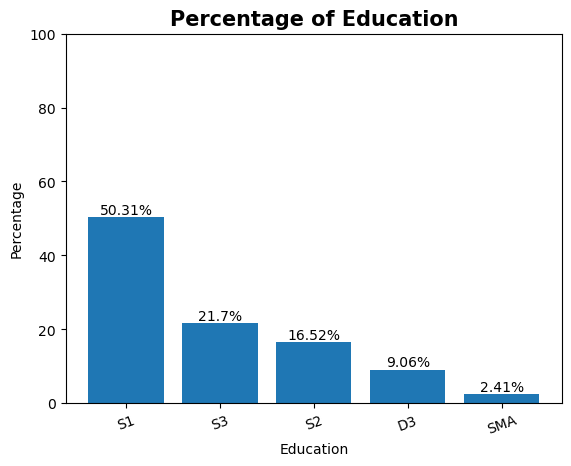

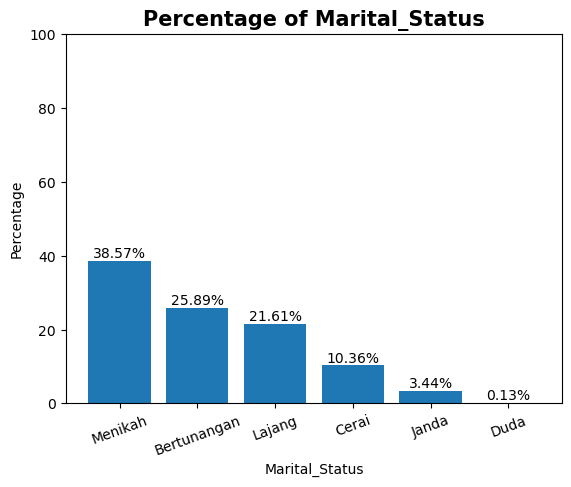

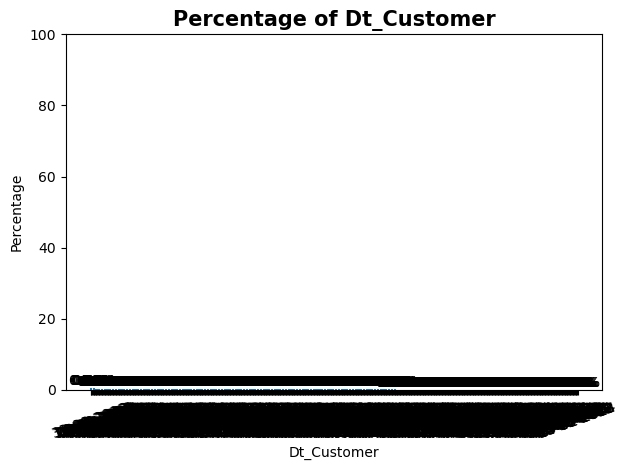

In [8]:
cat_var=df.select_dtypes(exclude='number')

#Calculate the percentage of each categorical variable
for column in cat_var:
  counts = df[column].value_counts()
  percent = round((counts / len(df)) * 100,2)

#Create the bar plot
  fig, ax = plt.subplots()
  ax.bar(counts.index, percent)
  ax.set_xlabel(column)
  ax.set_ylabel('Percentage')
  ax.set_ylim(0,100)
  ax.set_title(f'Percentage of {column}', fontweight='bold', fontsize=15)

#Add percentage
  for i in range(len(percent)):
    value = round(percent[i],2)
    label = f'{value}%'
    plt.text(i, percent[i], label, ha ='center', va='bottom')
    plt.xticks(rotation=20)

plt.tight_layout()
plt.show

In [6]:
#create total accepted campaign
df['Total_Acc_Cmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

#create total purchases feature
df['Total_Purchases'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

#create total spend feature
df['Total_Spent'] = df['MntCoke']+df['MntFishProducts']+df['MntFruits']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntGoldProds']

#create ammount of children feature
df['NumChildren'] = df['Kidhome']+df['Teenhome']

In [7]:
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y
df['conversion_rate'] = df.apply(lambda x: safe_div(x['Total_Purchases'],x['NumWebVisitsMonth']), axis=1)

In [8]:
from datetime import date

df['Dt_Collected'] = date.today()
df['Dt_Collected'] = pd.to_datetime(df['Dt_Collected'])
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Dt_Days_Customer'] = df['Dt_Collected'] - df['Dt_Customer']
df['Dt_Days_Customer'] = df['Dt_Days_Customer'].dt.days

## TUGAS 2
Conversion Rate Analysis Based On Income, Spending And Age


In [9]:
df['Age'] = 2023 - df['Year_Birth']

#group age
age_list=[]
for i in df['Age']:
    if i >= 0 and i <= 4:
        group = 'Balita'
    elif i >= 5 and i <= 12:
        group = 'Children'
    elif i >= 13 and i <= 17:
        group = 'Teenager'
    elif i >= 18 and i <= 24:
        group = 'Young_Adult'
    elif i >= 25 and i <= 39:
        group = 'Adult'
    elif i >= 40 and i <= 59:
        group = 'Middle Aged'
    else:
        group = 'Senior Citizen'
    age_list.append(group)
df['Age_Group'] = age_list

### Conversion Rate Based on Age

In [10]:
df_agg = df.groupby('Age_Group').agg({'conversion_rate':'sum'}).reset_index()
df_agg['sum_cvr'] = df_agg['conversion_rate'].sum()
df_agg['percentage'] = round((df_agg['conversion_rate']/df_agg['sum_cvr'])*100, 2)
df_agg

,Age_Group,conversion_rate,sum_cvr,percentage
0,Adult,1241.880201,9845.297974,12.61
1,Middle Aged,4686.275919,9845.297974,47.60
2,Senior Citizen,3917.141855,9845.297974,39.79


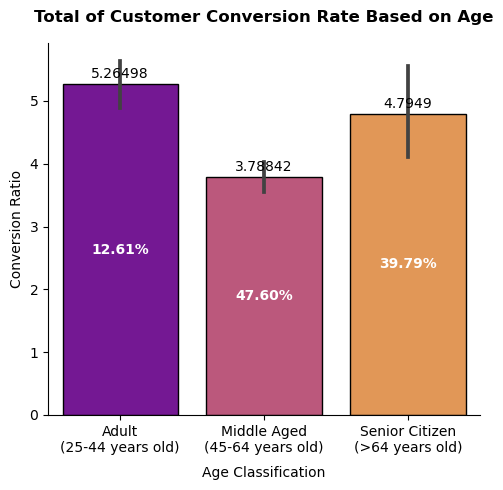

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.title("Total of Customer Conversion Rate Based on Age", fontsize=12, color='black', weight='bold', pad=15)
sns.barplot(x='Age_Group', y='conversion_rate', data=df, edgecolor='black', palette='plasma')

plt.ylabel('Conversion Ratio')
plt.xlabel('Age Classification', labelpad=8)
plt.xticks(np.arange(3), ['Adult\n(25-44 years old)', 'Middle Aged\n(45-64 years old)', 'Senior Citizen\n(>64 years old)'])

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['12.61%', '47.60%', '39.79%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()
plt.savefig('customer_cvr.png')



### Conversion Rate Based on Income

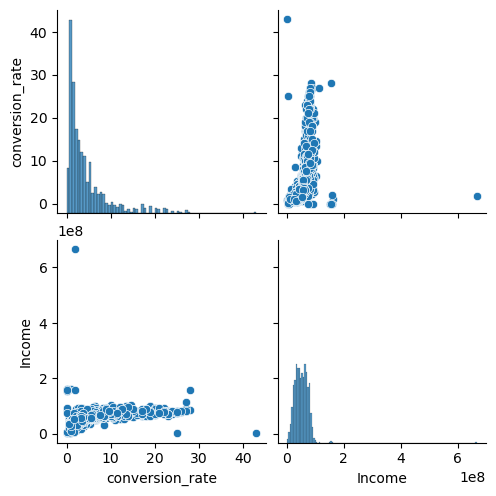

In [15]:
# Memilih kolom yang diperlukan
data = df[['conversion_rate', 'Income']]

# Membuat scatter plot matrix
sns.pairplot(data)

# Menampilkan plot
plt.show()

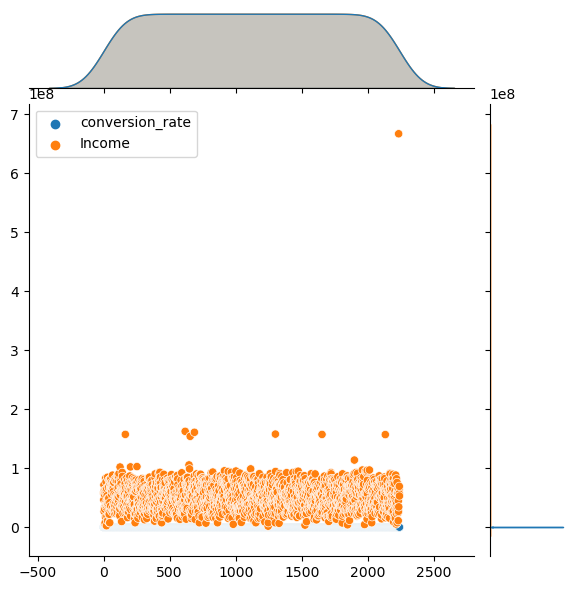

In [16]:
# Memilih kolom yang diperlukan
data = df[['conversion_rate', 'Income']]

# Membuat scatter plot matrix
sns.jointplot(data)

# Menampilkan plot
plt.show()

### Conversion Rate Based on Spending

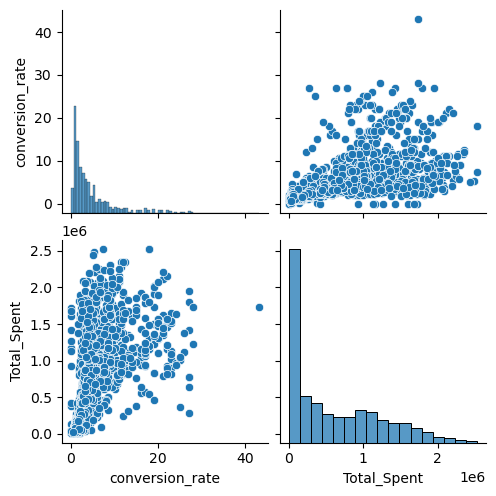

In [17]:
#create total spend feature
df['Total_Spent'] = df['MntCoke']+df['MntFishProducts']+df['MntFruits']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntGoldProds']


# Memilih kolom yang diperlukan
data = df[['conversion_rate', 'Total_Spent']]

# Membuat scatter plot matrix
sns.pairplot(data)

# Menampilkan plot
plt.show()

# Tugas 2
Data Cleaning & Preprocessing

In [11]:
df_copy = df.copy()

In [12]:
df_copy.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Total_Acc_Cmp           0
Total_Purchases         0
Total_Spent             0
NumChildren             0
conversion_rate         0
Dt_Collected            0
Dt_Days_Customer        0
Age                     0
Age_Group   

### Handle Missing Value

In [13]:
#Handle Missing Value
df_copy['Income'] = df_copy['Income'].fillna(df_copy['Income'].median())

In [14]:
#create ammount of children feature
df_copy['Number_Children'] = df['Kidhome']+df['Teenhome']

### Drop data 

In [15]:
#Drop data
df_copy.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                'MntCoke','MntFishProducts','MntFruits','MntMeatProducts','MntSweetProducts', 'MntGoldProds',
                'Kidhome','Teenhome', 'Response'], inplace=True, axis=1)

In [16]:
df_copy.drop(['Unnamed: 0', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Collected', 'NumChildren'], inplace=True, axis=1)

In [17]:
df_copy.Marital_Status

0            Lajang
1            Lajang
2       Bertunangan
3       Bertunangan
4           Menikah
           ...     
2235        Menikah
2236    Bertunangan
2237          Cerai
2238    Bertunangan
2239        Menikah
Name: Marital_Status, Length: 2240, dtype: object

In [18]:
df_copy['Marital_Status'] = df_copy['Marital_Status'].replace('Cerai', 'Single')
df_copy['Marital_Status'] = df_copy['Marital_Status'].replace('Janda', 'Single')
df_copy['Marital_Status'] = df_copy['Marital_Status'].replace('Duda', 'Single')
df_copy['Marital_Status'] = df_copy['Marital_Status'].replace('Lajang', 'Single')
df_copy.head(5)

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Total_Acc_Cmp,Total_Purchases,Total_Spent,conversion_rate,Dt_Days_Customer,Age,Age_Group,Number_Children
0,S1,Single,58138000.0,2012-04-09,58,7,0,0,25,1617000,3.571429,4131,66,Senior Citizen,0
1,S1,Single,46344000.0,2014-08-03,38,5,0,0,6,27000,1.200000,3285,69,Senior Citizen,2
2,S1,Bertunangan,71613000.0,2013-08-21,26,4,0,0,21,776000,5.250000,3632,58,Middle Aged,0
3,S1,Bertunangan,26646000.0,2014-10-02,26,6,0,0,8,53000,1.333333,3225,39,Adult,1
4,S3,Menikah,58293000.0,2014-01-19,94,5,0,0,19,422000,3.800000,3481,42,Middle Aged,1


In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Education          2240 non-null   object        
 1   Marital_Status     2240 non-null   object        
 2   Income             2240 non-null   float64       
 3   Dt_Customer        2240 non-null   datetime64[ns]
 4   Recency            2240 non-null   int64         
 5   NumWebVisitsMonth  2240 non-null   int64         
 6   Complain           2240 non-null   int64         
 7   Total_Acc_Cmp      2240 non-null   int64         
 8   Total_Purchases    2240 non-null   int64         
 9   Total_Spent        2240 non-null   int64         
 10  conversion_rate    2240 non-null   float64       
 11  Dt_Days_Customer   2240 non-null   int64         
 12  Age                2240 non-null   int64         
 13  Age_Group          2240 non-null   object        
 14  Number_C

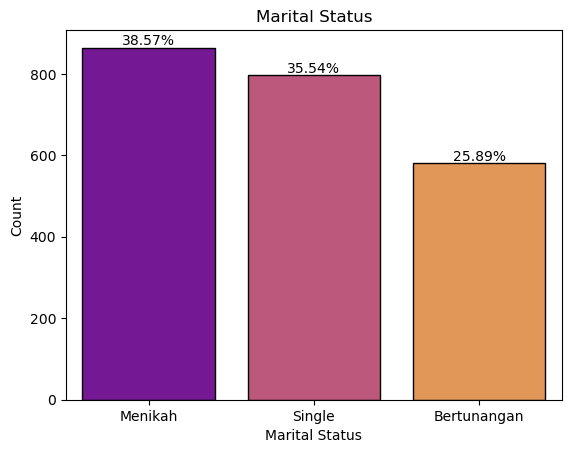

In [20]:
counts = df_copy['Marital_Status'].value_counts()
percent = round((counts / len(df_copy)) * 100, 2)
sns.barplot(x=counts.index, y=counts.values, edgecolor='black', palette='plasma')

# Menampilkan persentase pada plot
for i, count in enumerate(counts):
    plt.text(i, count, f'{percent[i]}%', ha='center', va='bottom')

plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

## Handle Duplicated Data

In [30]:
df_copy[df_copy.duplicated(keep='last')].head(5)

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Total_Acc_Cmp,Total_Purchases,Total_Spent,conversion_rate,Dt_Days_Customer,Age,Age_Group,Number_Children
8,S3,Bertunangan,30351000.0,2013-06-06,19,9,0,0,6,46000,0.666667,3708,49,Middle Aged,1
15,S3,Single,82800000.0,2012-11-24,23,3,0,2,26,1315000,8.666667,3902,77,Senior Citizen,0
17,S1,Bertunangan,37760000.0,2012-08-31,20,7,0,0,13,317000,1.857143,3987,77,Senior Citizen,0
23,S3,Menikah,65324000.0,2014-11-01,0,4,0,0,20,544000,5.000000,3195,69,Senior Citizen,1
24,S1,Bertunangan,40689000.0,2013-03-18,69,8,0,0,20,444000,2.500000,3788,72,Senior Citizen,1


In [31]:
df_copy[df_copy.duplicated(keep='first')].head(10)

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Total_Acc_Cmp,Total_Purchases,Total_Spent,conversion_rate,Dt_Days_Customer,Age,Age_Group,Number_Children
83,S2,Bertunangan,38620000.0,2013-11-05,56,3,0,0,11,318000,3.666667,3556,60,Senior Citizen,0
179,D3,Menikah,78497000.0,2013-01-12,44,2,0,1,25,978000,12.500000,3853,72,Senior Citizen,0
281,S1,Bertunangan,51369000.0,2012-10-25,84,8,0,0,16,576000,2.000000,3932,47,Middle Aged,1
282,S1,Bertunangan,37760000.0,2012-08-31,20,7,0,0,13,317000,1.857143,3987,77,Senior Citizen,0
363,S3,Menikah,37717000.0,2012-11-23,31,9,0,0,4,25000,0.444444,3903,45,Middle Aged,1
383,D3,Menikah,35688000.0,2012-08-22,94,8,0,0,16,211000,2.000000,3996,50,Middle Aged,3
408,S3,Bertunangan,30351000.0,2013-06-06,19,9,0,0,6,46000,0.666667,3708,49,Middle Aged,1
421,S1,Menikah,30096000.0,2014-05-22,30,6,0,0,6,45000,1.000000,3358,40,Middle Aged,1
443,S1,Single,30279000.0,2012-12-30,13,8,0,0,5,37000,0.625000,3866,34,Adult,1
463,S1,Menikah,80124000.0,2014-06-26,47,1,0,1,19,1495000,19.000000,3323,60,Senior Citizen,0


In [32]:
df_copy[df_copy.duplicated(keep=False)].head(10)

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Total_Acc_Cmp,Total_Purchases,Total_Spent,conversion_rate,Dt_Days_Customer,Age,Age_Group,Number_Children
8,S3,Bertunangan,30351000.0,2013-06-06,19,9,0,0,6,46000,0.666667,3708,49,Middle Aged,1
15,S3,Single,82800000.0,2012-11-24,23,3,0,2,26,1315000,8.666667,3902,77,Senior Citizen,0
17,S1,Bertunangan,37760000.0,2012-08-31,20,7,0,0,13,317000,1.857143,3987,77,Senior Citizen,0
23,S3,Menikah,65324000.0,2014-11-01,0,4,0,0,20,544000,5.000000,3195,69,Senior Citizen,1
24,S1,Bertunangan,40689000.0,2013-03-18,69,8,0,0,20,444000,2.500000,3788,72,Senior Citizen,1
29,S3,Menikah,84618000.0,2013-11-22,96,2,0,1,26,1672000,13.000000,3539,58,Middle Aged,0
30,S2,Single,10979000.0,2014-05-22,34,5,0,0,8,30000,1.600000,3358,34,Adult,0
31,S2,Bertunangan,38620000.0,2013-11-05,56,3,0,0,11,318000,3.666667,3556,60,Senior Citizen,0
38,S1,Single,42429000.0,2014-11-02,99,5,0,0,7,67000,1.400000,3194,50,Middle Aged,1
39,S3,Single,48948000.0,2013-01-02,53,6,0,1,24,902000,4.000000,3863,80,Senior Citizen,0


In [33]:
df_copy = df_copy.drop_duplicates(keep = 'first')

In [34]:
df_copy.head(2)

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Total_Acc_Cmp,Total_Purchases,Total_Spent,conversion_rate,Dt_Days_Customer,Age,Age_Group,Number_Children
0,S1,Single,58138000.0,2012-04-09,58,7,0,0,25,1617000,3.571429,4131,66,Senior Citizen,0
1,S1,Single,46344000.0,2014-08-03,38,5,0,0,6,27000,1.200000,3285,69,Senior Citizen,2


### Handle Outlier

In [21]:
df_copy_num = df_copy.select_dtypes(include = 'number')
df_copy_cat = df_copy.select_dtypes(exclude = 'number')
print(df_copy_num.columns)
print(df_copy_cat.columns)

Index(['Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Total_Acc_Cmp',
       'Total_Purchases', 'Total_Spent', 'conversion_rate', 'Dt_Days_Customer',
       'Age', 'Number_Children'],
      dtype='object')
Index(['Education', 'Marital_Status', 'Dt_Customer', 'Age_Group'], dtype='object')


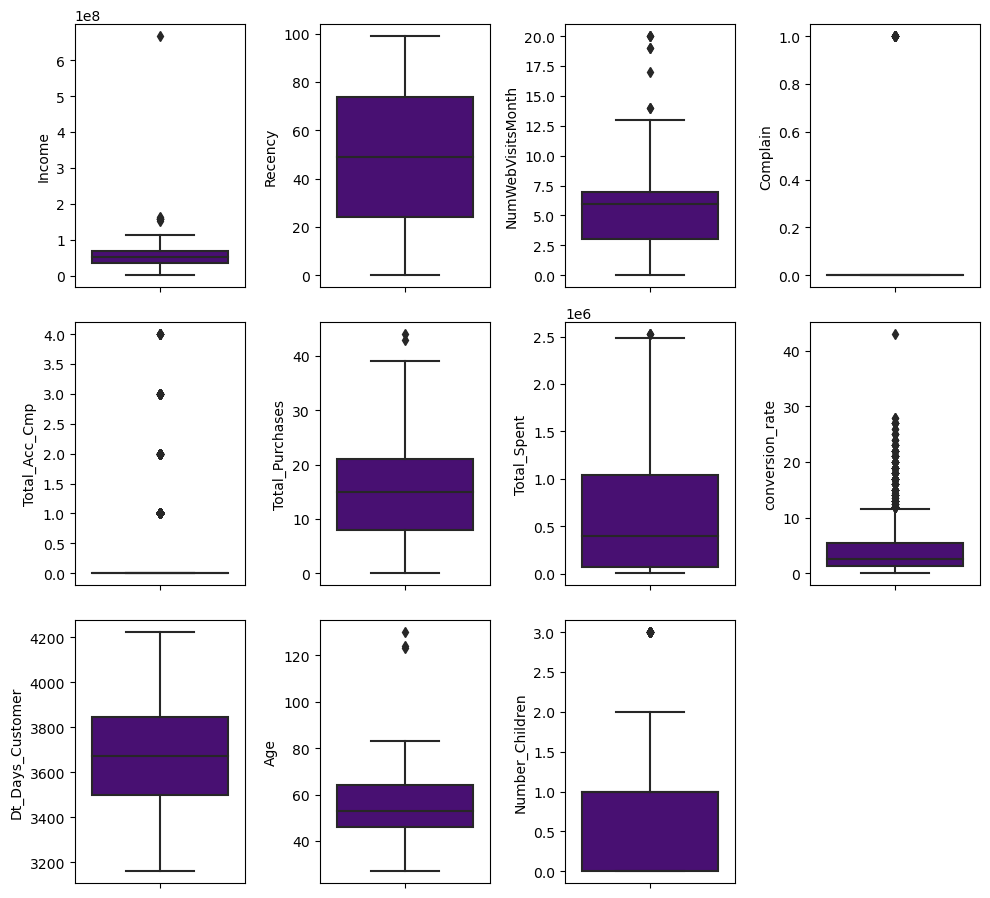

In [22]:
features = df_copy_num.columns
plt.figure(figsize= (10,15))
for i in range(len(features)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y = df_copy[features[i]], color ='indigo', orient='v')
    plt.tight_layout()

In [23]:
outliers = df_copy[['Income', 'NumWebVisitsMonth', 'Total_Purchases', 'Total_Spent', 'conversion_rate', 'Age', 'Number_Children']]

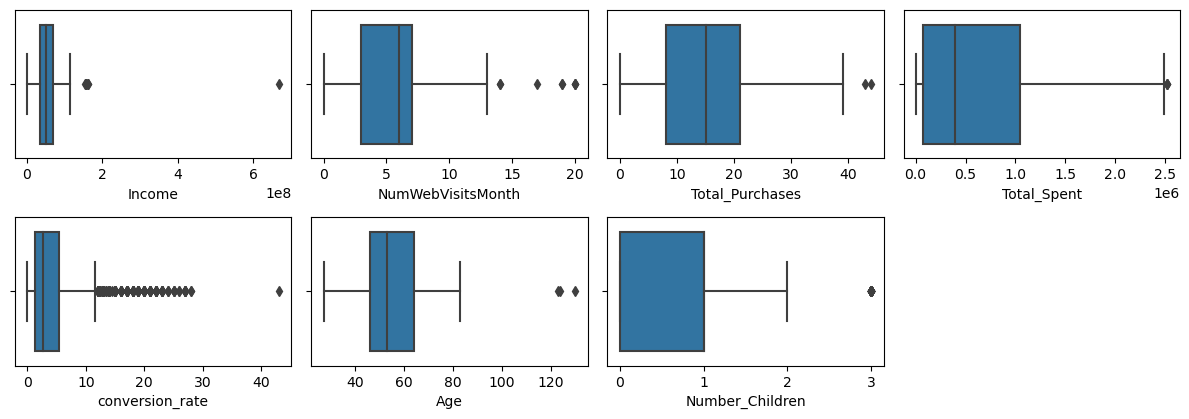

In [24]:
cols = outliers.columns

plt.figure(figsize=(12,8))
for i, column in enumerate (df_copy[cols].columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df_copy[cols], x=df_copy[column])
    plt.tight_layout()

In [25]:
for col in cols:
    high_cut = df_copy[col].quantile(q=0.95)
    low_cut= df_copy[col].quantile(q=0.01)
    df_copy.loc[df_copy[col]>high_cut,col]=high_cut
    df_copy.loc[df_copy[col]<low_cut,col]=low_cut

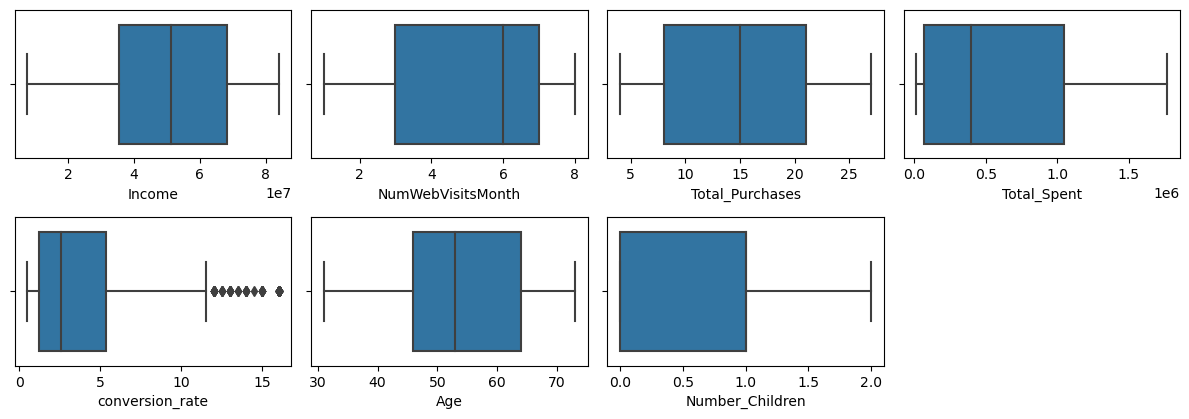

In [26]:
cols = outliers.columns

plt.figure(figsize=(12,8))
for i, column in enumerate (df_copy[cols].columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df_copy[cols], x=df_copy[column])
    plt.tight_layout()

In [27]:
df_copy.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Total_Acc_Cmp,Total_Purchases,Total_Spent,conversion_rate,Dt_Days_Customer,Age,Age_Group,Number_Children
0,S1,Single,58138000.0,2012-04-09,58,7,0,0,25,1617000.0,3.571429,4131,66,Senior Citizen,0
1,S1,Single,46344000.0,2014-08-03,38,5,0,0,6,27000.0,1.200000,3285,69,Senior Citizen,2
2,S1,Bertunangan,71613000.0,2013-08-21,26,4,0,0,21,776000.0,5.250000,3632,58,Middle Aged,0
3,S1,Bertunangan,26646000.0,2014-10-02,26,6,0,0,8,53000.0,1.333333,3225,39,Adult,1
4,S3,Menikah,58293000.0,2014-01-19,94,5,0,0,19,422000.0,3.800000,3481,42,Middle Aged,1


In [28]:
df_copy_enc = df_copy.copy()

In [29]:
# label encoding Education
MappingEducation = {
    'SMA' : 0,
    'D3' : 1,
    'S1' : 2,
    'S2' : 3,
    'S3' : 4
}

df_copy_enc['Education'] = df_copy_enc['Education'].map(MappingEducation)

In [30]:
for i in ['Marital_Status','Age_Group']:
  onehots = pd.get_dummies(df_copy_enc[i],prefix='enc')
  df_copy_enc=df_copy_enc.join(onehots)

In [31]:
df_copy_enc = df_copy_enc.drop(['Marital_Status','Age_Group'],axis=1)

In [32]:
df_final = df_copy_enc[['Recency', 'Total_Purchases', 'Total_Spent', 'Dt_Days_Customer', 'Age']]

In [33]:
df_final.describe()

,Recency,Total_Purchases,Total_Spent,Dt_Days_Customer,Age
count,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000
mean,49.109375,14.732143,5.940284e+05,3672.043304,53.989732
std,28.962453,7.360654,5.749063e+05,232.229893,11.409209
min,0.000000,4.000000,1.300000e+04,3160.000000,31.000000
25%,24.000000,8.000000,6.875000e+04,3500.750000,46.000000
50%,49.000000,15.000000,3.960000e+05,3673.000000,53.000000
75%,74.000000,21.000000,1.045500e+06,3845.250000,64.000000
max,99.000000,27.000000,1.772300e+06,4223.000000,73.000000


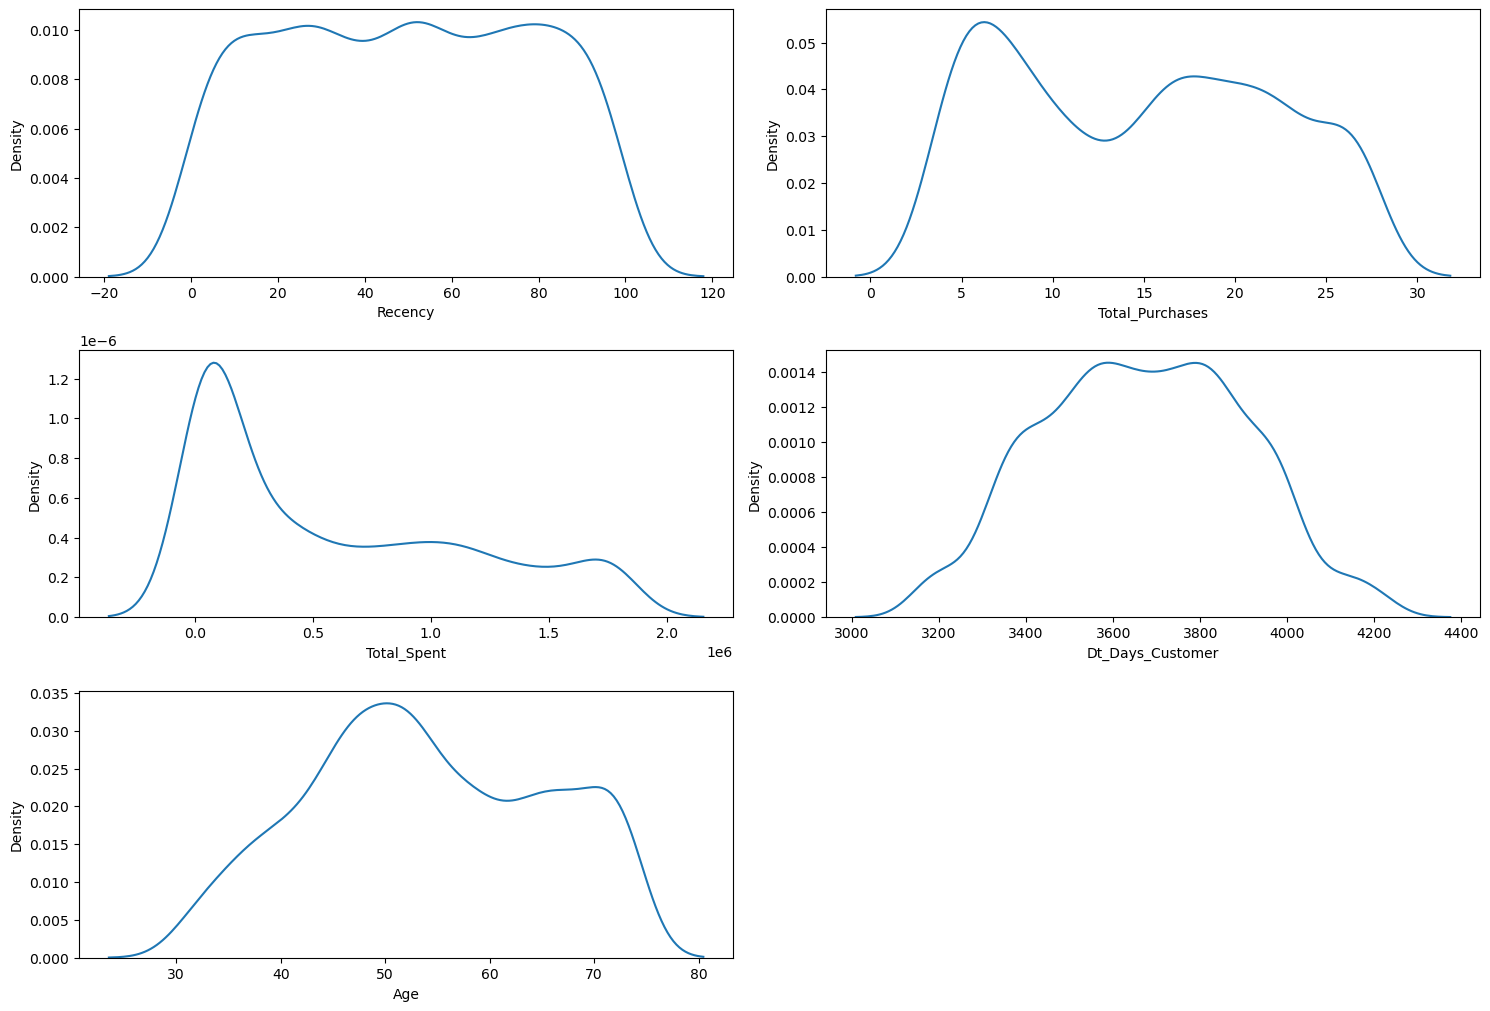

In [48]:
cols = df_final.columns

plt.figure(figsize= (15, 20))
for i in range(len(cols)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x = df_final[cols[i]])
    plt.tight_layout()

<Axes: xlabel='Total_Spent', ylabel='Density'>

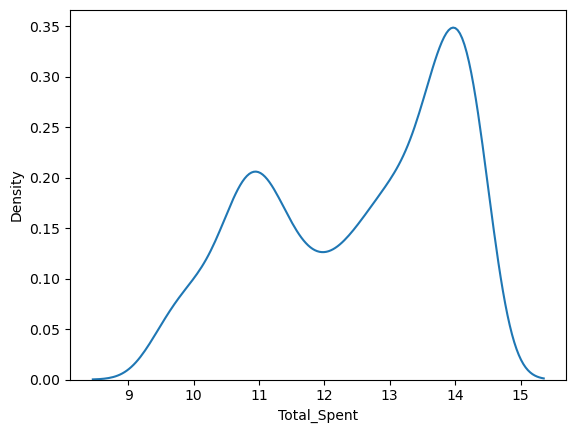

In [49]:
#Log Transformasi
df_final['log_TotalSpent'] = np.log(df_final['Total_Spent'])
sns.kdeplot(np.log(df_final['Total_Spent']))

In [50]:
df_final = df_final.drop(columns='Total_Spent')

In [51]:
df_final.head()

,Recency,Total_Purchases,Dt_Days_Customer,Age,log_TotalSpent
0,58,25,4131,66,14.296083
1,38,6,3285,69,10.203592
2,26,21,3632,58,13.561908
3,26,8,3225,39,10.878047
4,94,19,3481,42,12.952761


In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
col_name = list(df_final.columns)

mm = MinMaxScaler()
df_std = mm.fit_transform(df_final)
df_std = pd.DataFrame(df_std, columns=col_name)
df_std.sample(10)

,Recency,Total_Purchases,Dt_Days_Customer,Age,log_TotalSpent
1960,0.303030,0.521739,0.514581,0.452381,0.641912
339,0.717172,0.608696,0.508937,1.000000,0.747496
140,0.040404,0.565217,0.364064,0.380952,0.894564
1914,0.909091,0.043478,0.530574,1.000000,0.236476
1724,0.525253,0.695652,0.300094,0.809524,0.967762
1536,0.777778,0.086957,0.117592,0.333333,0.340267
1373,0.161616,0.913043,0.003763,0.523810,1.000000
761,0.969697,0.347826,0.276576,0.761905,0.268926
1774,0.626263,0.869565,0.702728,1.000000,0.832884
424,0.767677,1.000000,0.641580,0.595238,0.900031


In [53]:
df_std.describe()

,Recency,Total_Purchases,Dt_Days_Customer,Age,log_TotalSpent
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,0.496398,0.466836,0.480220,0.548496,0.622625
std,0.292575,0.319403,0.217946,0.271144,0.296327
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242424,0.173913,0.318909,0.357143,0.345452
50%,0.494949,0.478261,0.480715,0.523810,0.697776
75%,0.747475,0.739130,0.642521,0.785714,0.893126
max,1.000000,1.000000,1.000000,1.000000,1.000000


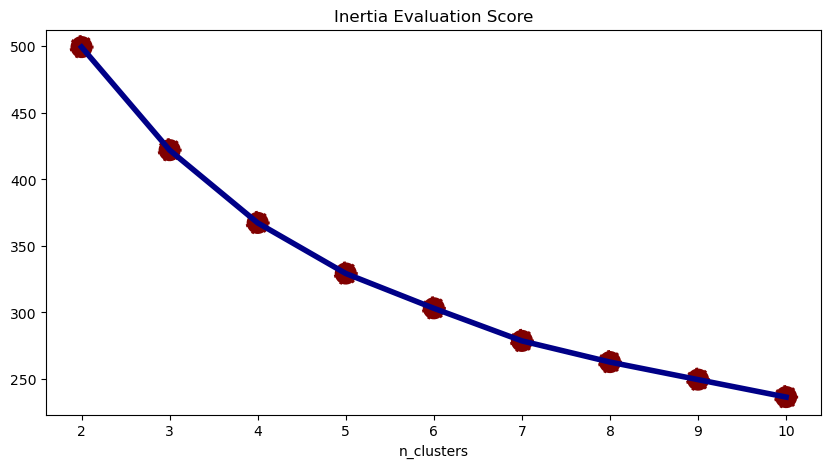

In [54]:
#Inertia
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(10, 5))
plt.title('Inertia Evaluation Score')
sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()

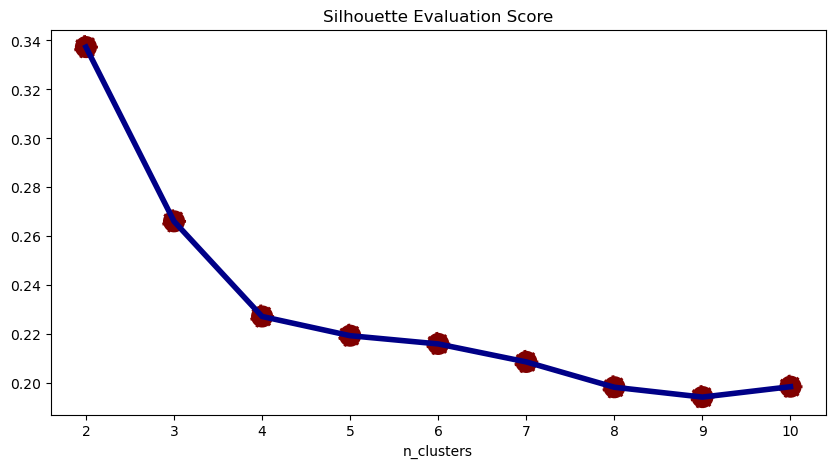

In [55]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std)
    preds = kmeans.predict(df_std)
    score_euclidean = silhouette_score(df_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Silhouette Evaluation Score')
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()

In [56]:
df_std_cluster = df_std.copy()
df_cluster = df_std.copy()

kmeans = KMeans(n_clusters=4, random_state=0).fit(df_std)
df_std_cluster['clusters'] = kmeans.labels_
df_cluster['clusters'] = kmeans.labels_

In [57]:
df_cluster.sample(10)

,Recency,Total_Purchases,Dt_Days_Customer,Age,log_TotalSpent,clusters
249,0.525253,0.086957,0.380997,0.166667,0.149795,2
1836,0.616162,0.826087,0.696143,0.523810,0.960872,1
250,0.050505,1.000000,0.546566,0.428571,0.905534,0
1837,0.686869,0.565217,0.621825,0.666667,0.719433,1
15,0.232323,0.956522,0.698024,1.000000,0.939274,0
1315,0.171717,0.043478,0.287865,0.476190,0.246294,2
1241,0.949495,0.652174,0.997178,0.309524,0.937738,1
1671,0.101010,0.000000,0.163688,0.738095,0.000000,2
1780,0.676768,0.826087,0.211665,0.190476,0.901329,1
760,0.050505,0.130435,0.722484,0.142857,0.307742,2


In [58]:
df_cluster.isna().sum()

Recency             0
Total_Purchases     0
Dt_Days_Customer    0
Age                 0
log_TotalSpent      0
clusters            0
dtype: int64

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcs = pca.transform(df_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = df_cluster['clusters']
df_pca.sample(10)

,PC 1,PC 2,clusters
1048,0.300802,-0.273403,2
1306,0.506888,-0.455457,2
1091,0.482454,0.007288,2
1737,-0.310407,0.332284,1
1482,-0.185730,0.364570,1
1147,-0.427726,0.177141,1
1996,-0.512577,-0.168334,0
1933,-0.612444,0.008795,1
332,-0.490691,-0.395916,0
1730,-0.433857,0.237363,1


In [60]:
map_cluster = {
    0 : 'Low Spender',
    1 : 'Risk of Churn',
    2 : 'Mid Spender',
    3 : 'High Spender'
}

df_pca['cluster_mapped'] = df_pca['clusters'].map(map_cluster)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Risk of Churn'),
  Text(1, 0, 'Mid Spender'),
  Text(2, 0, 'Low Spender'),
  Text(3, 0, 'High Spender')])

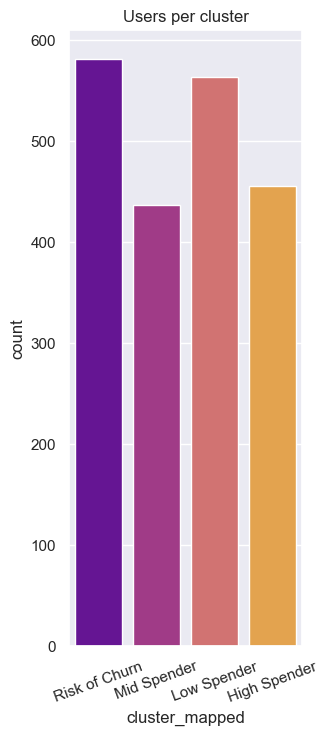

In [76]:
sns.set(rc={'figure.figsize':(3,8)})
sns.countplot(x=df_pca['cluster_mapped'], palette='plasma')
plt.title('Users per cluster')
plt.xticks(rotation=20)

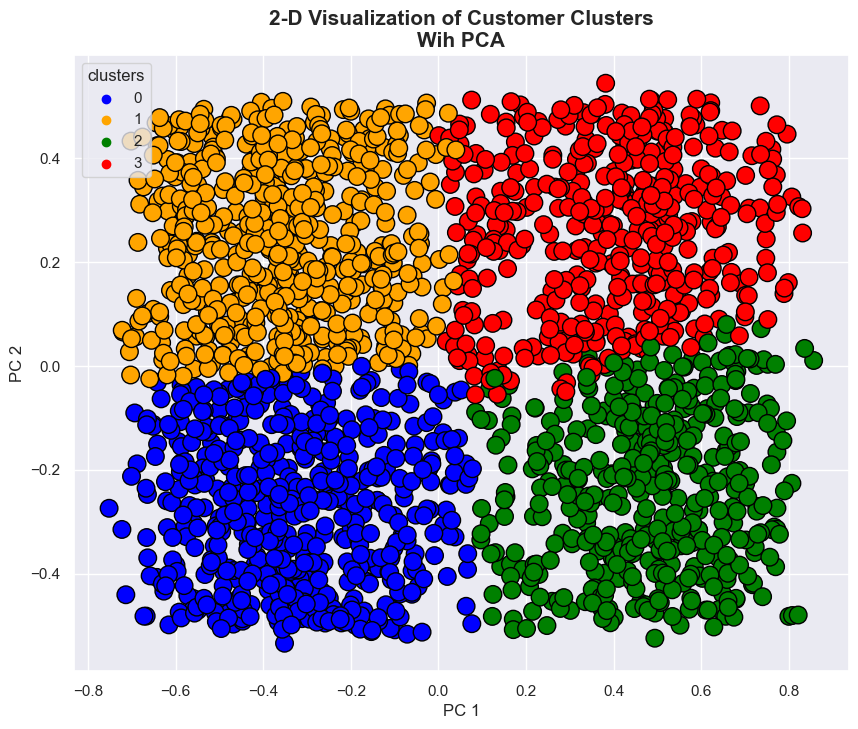

In [62]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("2-D Visualization of Customer Clusters\nWih PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    #linestyle='--',
    data=df_pca,
    palette=['blue','orange','green','red'],
    s=160,
    ax=ax
);

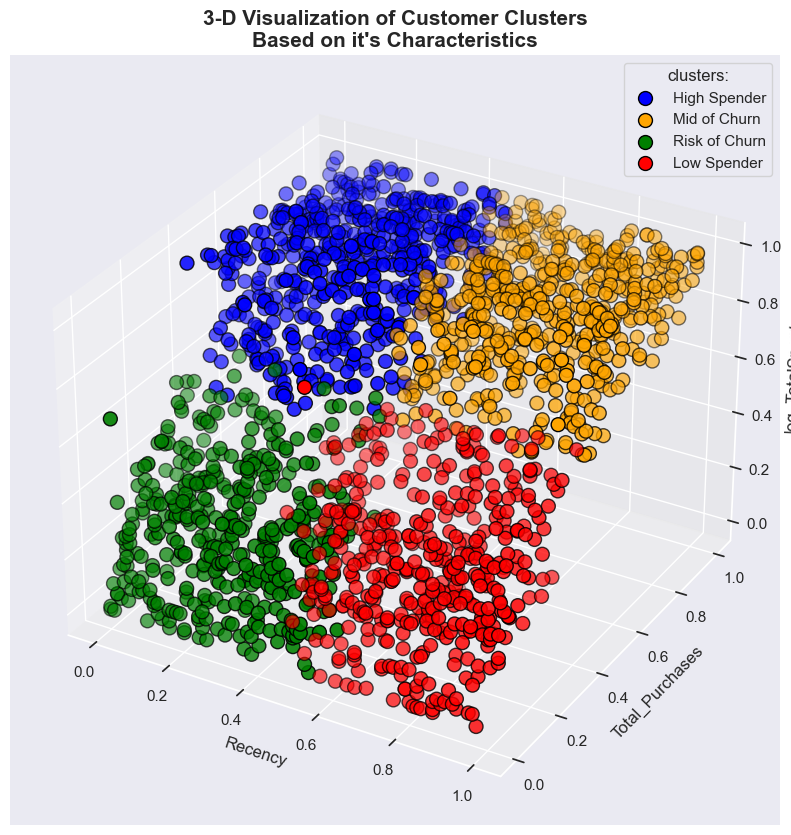

In [63]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics", fontsize=15, weight='bold')
ax.scatter(df_cluster['Recency'][df_cluster.clusters == 0], df_cluster['Total_Purchases'][df_cluster.clusters == 0], df_cluster['log_TotalSpent'][df_cluster.clusters == 0], c='blue', s=100, edgecolor='black', label='High Spender')
ax.scatter(df_cluster['Recency'][df_cluster.clusters == 1], df_cluster['Total_Purchases'][df_cluster.clusters == 1], df_cluster['log_TotalSpent'][df_cluster.clusters == 1], c='orange', s=100, edgecolor='black', label='Mid of Churn')
ax.scatter(df_cluster['Recency'][df_cluster.clusters == 2], df_cluster['Total_Purchases'][df_cluster.clusters == 2], df_cluster['log_TotalSpent'][df_cluster.clusters == 2], c='green', s=100, edgecolor='black', label='Risk of Churn')
ax.scatter(df_cluster['Recency'][df_cluster.clusters == 3], df_cluster['Total_Purchases'][df_cluster.clusters == 3], df_cluster['log_TotalSpent'][df_cluster.clusters == 3], c='red', s=100, edgecolor='black', label='Low Spender')
plt.xlabel('Recency')
plt.ylabel('Total_Purchases')
ax.set_zlabel('log_TotalSpent')
plt.legend(title='clusters:')
plt.show()

# Customer Personality Analysis For Marketing Retargeting

In [64]:
display(df_cluster.groupby('clusters').agg(['mean','median', 'max', 'min']))

Recency                               Total_Purchases            \
              mean    median       max       min            mean    median   
clusters                                                                     
0         0.232359  0.232323  0.505051  0.000000        0.707854  0.695652   
1         0.741720  0.737374  1.000000  0.464646        0.716905  0.695652   
2         0.250237  0.242424  0.585859  0.000000        0.134315  0.130435   
3         0.746276  0.767677  1.000000  0.404040        0.168657  0.130435   

                            Dt_Days_Customer                                \
               max      min             mean    median       max       min   
clusters                                                                     
0         1.000000  0.26087         0.500251  0.511759  0.998119  0.000941   
1         1.000000  0.26087         0.526262  0.533396  1.000000  0.000941   
2         0.478261  0.00000         0.437256  0.417686  1.000000  0.000000   
3         0.521739  0.00000         0.437906  0.435560  1.000000  0.002822   

               Age                     log_TotalSpent                      \
              mean    median  max  min           mean    median       max   
clusters                                                                    
0         0.581409  0.571429  1.0  0.0       0.847938  0.869570  1.000000   
1         0.613720  0.642857  1.0  0.0       0.860848  0.881132  1.000000   
2         0.438760  0.404762  1.0  0.0       0.299062  0.300555  0.712470   
3         0.529880  0.500000  1.0  0.0       0.350402  0.340267  0.988444   

                    
               min  
clusters            
0         0.574877  
1         0.559316  
2         0.000000  
3         0.000000

In [65]:
df_intp = df_cluster.groupby('clusters').agg({'Recency':'count'}).reset_index()
df_intp = df_intp.rename(columns={'Recency':'total_customers'})
df_intp['jmlh_cust'] = df_intp['total_customers'].sum()
df_intp['persentage'] = round((df_intp['total_customers']/df_intp['jmlh_cust'])*100, 2)
df_intp

,clusters,total_customers,jmlh_cust,persentage
0,0,563,2036,27.65
1,1,581,2036,28.54
2,2,437,2036,21.46
3,3,455,2036,22.35


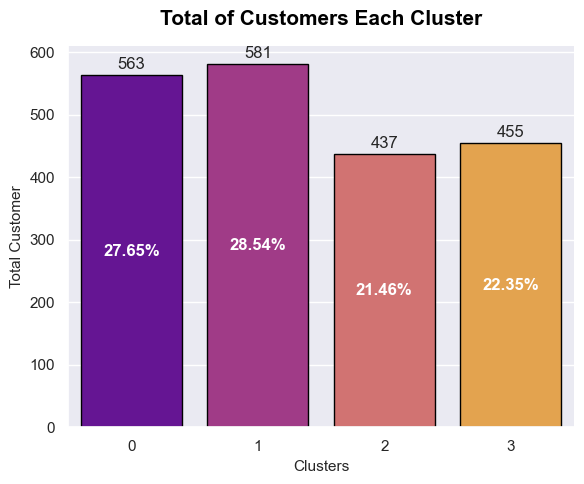

In [66]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.title("Total of Customers Each Cluster", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='clusters', y='total_customers', data=df_intp, edgecolor='black', palette='plasma')

plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['27.65%', '28.54%', '21.46%', '22.35%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()

### Total Spending/Cluster

In [67]:
df1 = df_cluster.copy()
dff = df1.columns.drop('clusters')

<Axes: xlabel='clusters', ylabel='Recency'>

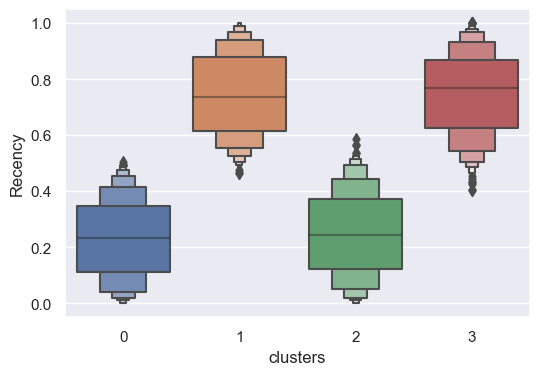

In [69]:
plt.figure(figsize= (6, 4))
sns.boxenplot(x=df_cluster['clusters'], y=df_cluster['Recency'])

<Axes: xlabel='clusters', ylabel='Total_Purchases'>

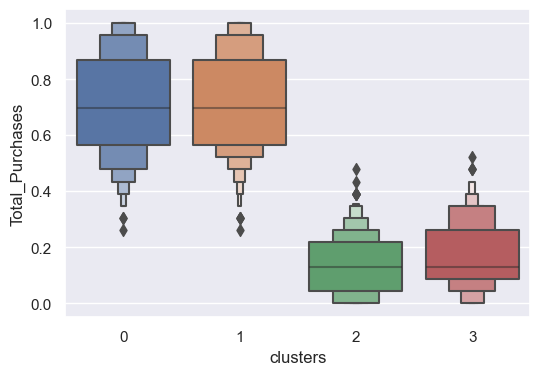

In [70]:
plt.figure(figsize= (6, 4))
sns.boxenplot(x=df_cluster['clusters'], y=df_cluster['Total_Purchases'])

<Axes: xlabel='clusters', ylabel='Dt_Days_Customer'>

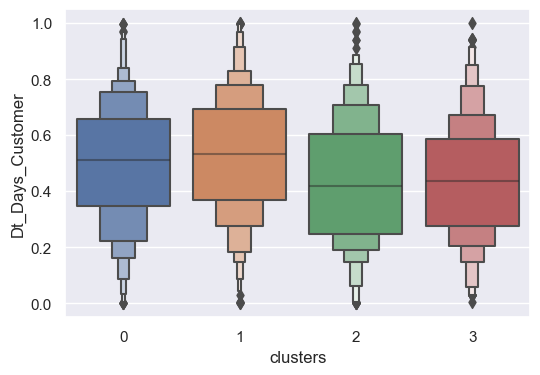

In [71]:
plt.figure(figsize= (6, 4))
sns.boxenplot(x=df_cluster['clusters'], y=df_cluster['Dt_Days_Customer'])

<Axes: xlabel='clusters', ylabel='log_TotalSpent'>

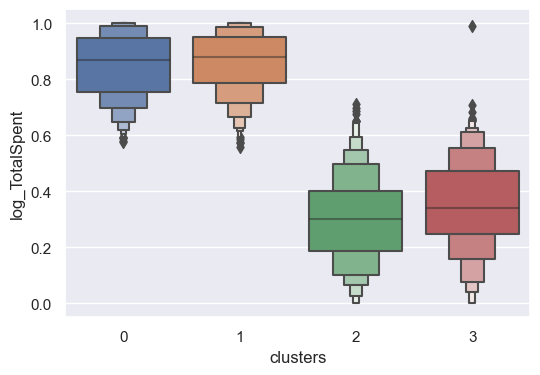

In [72]:
plt.figure(figsize= (6, 4))
sns.boxenplot(x=df_cluster['clusters'], y=df_cluster['log_TotalSpent'])

In [73]:
df_copy['Clusters'] = kmeans.labels_
df_copy.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Total_Acc_Cmp,Total_Purchases,Total_Spent,conversion_rate,Dt_Days_Customer,Age,Age_Group,Number_Children,Clusters
0,S1,Single,58138000.0,2012-04-09,58,7,0,0,25,1617000.0,3.571429,4131,66,Senior Citizen,0,1
1,S1,Single,46344000.0,2014-08-03,38,5,0,0,6,27000.0,1.200000,3285,69,Senior Citizen,2,2
2,S1,Bertunangan,71613000.0,2013-08-21,26,4,0,0,21,776000.0,5.250000,3632,58,Middle Aged,0,0
3,S1,Bertunangan,26646000.0,2014-10-02,26,6,0,0,8,53000.0,1.333333,3225,39,Adult,1,2
4,S3,Menikah,58293000.0,2014-01-19,94,5,0,0,19,422000.0,3.800000,3481,42,Middle Aged,1,1


In [74]:
age_cluster = df_copy.groupby(['Clusters', 'Age_Group']).agg({'Education':'count'}).reset_index()
age_cluster = age_cluster.rename(columns={'Education':'Total_Cust'})
age_cluster['sum_cust'] = age_cluster['Total_Cust'].sum()
age_cluster['percentage'] = round((age_cluster['Total_Cust']/age_cluster['sum_cust'])*100, 2)
age_cluster

,Clusters,Age_Group,Total_Cust,sum_cust,percentage
0,0,Adult,46,2036,2.26
1,0,Middle Aged,300,2036,14.73
2,0,Senior Citizen,217,2036,10.66
3,1,Adult,49,2036,2.41
4,1,Middle Aged,282,2036,13.85
5,1,Senior Citizen,250,2036,12.28
6,2,Adult,84,2036,4.13
7,2,Middle Aged,276,2036,13.56
8,2,Senior Citizen,77,2036,3.78
9,3,Adult,54,2036,2.65


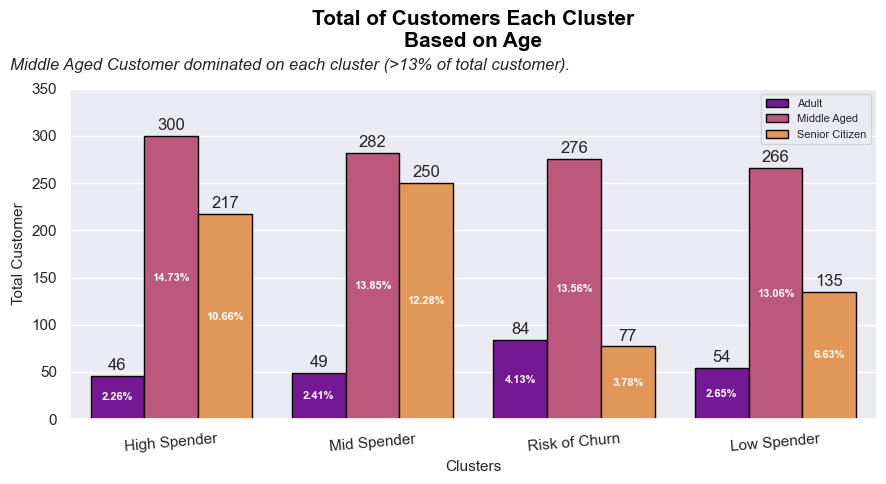

In [75]:
fig, ax = plt.subplots(figsize=(9, 5))
plt.title("Total of Customers Each Cluster\nBased on Age", fontsize=15, color='black', weight='bold', pad=30)
sns.barplot(x='Clusters', y='Total_Cust', data=age_cluster, hue='Age_Group', edgecolor='black', palette='plasma')
plt.text(x=-0.8, y=370, s="Middle Aged Customer dominated on each cluster (>13% of total customer).", fontsize=12, fontstyle='italic')
plt.xlabel('Clusters', fontsize=11)
plt.xticks(np.arange(4), ['High Spender', 'Mid Spender', 'Risk of Churn', 'Low Spender'], rotation=5)
plt.ylabel('Total Customer', fontsize=11)
plt.ylim(0, 350)
plt.legend(prop={'size':8}, loc='best')
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)
plt.bar_label(ax.containers[2], padding=2)
plt.bar_label(ax.containers[0], ['2.26%', '2.41%', '4.13%', '2.65%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[1], ['14.73%', '13.85%', '13.56%', '13.06%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[2], ['10.66%', '12.28%', '3.78%', '6.63%'], label_type='center', color='white', weight='bold', fontsize=8)
sns.despine()
plt.tight_layout()

# Sumamary

1. High Spender
- This group is dominated by middle aged (45-54 years old) who are predominantly married and have 1 child.
- there are 563 customers (27.65% of total customers) on this group.
- Customers on this group have `high average recency (25 days)` and `high average of total purchases (70 items)` it means they are frequent shoppers and `they spend a lot on our platform (around IDR 9M/year)`
- This group has a high conversion rate.

2. mid spender
- Dominated by middle aged (13.85%) who are predominantly married and have 1 child.
- there are 581 customers (28.54% of total customers) on this group 
- Customers on this group have `high average recency (78 days)` and `high average of total purchases (70 items)` and `they spend a lot on our platform (around IDR 9M/year)`


3. Risk of Churn
- there are 437 customers (22.35% of total customers) on this group
- Dominated by middle aged (13.85%) who are predominantly married and have 1 child.
- Customers on this group have `high average recency (25 days)` and `high average of total purchases (15 items)` and `they spend a lot on our platform (around IDR 2.7M/year)`

4. Low Spender
- there are 455 customers (21.46% of total customers) on this group
- Dominated by middle aged (13.85%) who are predominantly married and have 1 child.
- Customers on this group have `high average recency (70 days)` and `high average of total purchases (16 items)` and `they spend a lot on our platform (around IDR 3M/year)`

Recommendations
1. Keep monitoring transactions and retention of the High Spender group, Focus on improving service so that this group group does not churn.
2. For the Mid Spender group, further analysis can be done on how to increase transactions by providing more personalized recommendations, as well as deeper analysis on how to optimize promos in this segment and keep shopping on our platform.
3. For the Low Spender group, further analysis can also be done on how to increase the conversion rate of visits to transactions, They have a fairly high recency but do not make transactions. This can be caused by products or prices that do not match.

In [135]:
print('Total Spent of High Spender: '+str(df_copy[df_copy['Clusters']==0].Total_Spent.sum()))
print('Total Spent of Mid Spender: '+str(df_copy[df_copy['Clusters']==1].Total_Spent.sum()))
print('Total Spent of Risk of Churn: '+str(df_copy[df_copy['Clusters']==2].Total_Spent.sum()))
print('Total Spent of Low Spender: '+str(df_copy[df_copy['Clusters']==3].Total_Spent.sum()))
print('Total Spent: '+str(545880250+588456250+32527500+44894850))

Total Spent of High Spender: 545880250.0
Total Spent of Mid Spender: 588456250.0
Total Spent of Risk of Churn: 32527500.0
Total Spent of Low Spender: 44894850.0
Total Spent: 1211758850


*Potential Impact (Quantitative)*:
- If we keep prioritize on Customer Groups/Clusters and they do not turn to churn, we still have potential GMV around `IDR 1.2B/year` (High Spender: 545m/year; Mid Spender: 588M/year; 

High-Valued Customer=IDR 670M/year; Low-Valued Customer=IDR 46M/year; Low-Valued Frequent Customer=IDR 604M/year; Low-Valued Customer=IDR 47M/year)